# 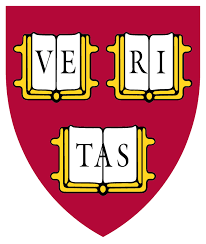 CS-S109A Introduction to Data Science 

## Lecture 1: Example


**Harvard University**<br/>
**Summer 2021**<br/>
**Instructors**: Kevin Rader

---

## If you have not installed Conda and have Jupyter Notebooks running properly on your computer, please see *Lab 0* on the course Canvas website (or on git).

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
%matplotlib inline


Download the data from (29MB):

https://drive.google.com/open?id=0B28c493CP9GtMzN1emFoMkJNNlU


## 1. Data Manipulation & Wrangling

Manipulation, not Modificaition (important distinction).  Fill-in the 3 different 'Your code here' sections below to perform the tasks given.

In [3]:
# you may need to change the path here:
hubway_data_file = '~/Downloads/hubway_data/hubway_trips.csv'

# read in the data using pandas 'read_csv' funciton
hubway_data = pd.read_csv(hubway_data_file, low_memory=False)


In [4]:
# use the pd.head command to view the first 5 rows of the data set and pd.tail to print out the last 10 rows
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html


################
# Your code here
################

hubway_data.head()
hubway_data.tail(10)

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
1579015,1579016,1748013,Closed,300,11/30/2013 22:53:00,74.0,11/30/2013 22:58:00,87.0,T01217,Registered,'02138,NaN,Female
1579016,1579017,1748014,Closed,120,11/30/2013 23:07:00,128.0,11/30/2013 23:09:00,136.0,B01468,Registered,'02142,NaN,Male
1579017,1579018,1748015,Closed,900,11/30/2013 23:17:00,76.0,11/30/2013 23:32:00,96.0,B00585,Registered,'02131,NaN,Female
1579018,1579019,1748016,Closed,240,11/30/2013 23:24:00,134.0,11/30/2013 23:28:00,139.0,T01195,Registered,'02478,NaN,Male
1579019,1579020,1748017,Closed,360,11/30/2013 23:24:00,129.0,11/30/2013 23:30:00,133.0,T01069,Registered,'02138,NaN,Male
1579020,1579021,1748018,Closed,720,11/30/2013 23:30:00,130.0,11/30/2013 23:42:00,90.0,T01341,Registered,'02141,NaN,Male
1579021,1579022,1748019,Closed,480,11/30/2013 23:32:00,67.0,11/30/2013 23:40:00,88.0,T01328,Registered,'02143,NaN,Male
1579022,1579023,1748020,Closed,540,11/30/2013 23:32:00,137.0,11/30/2013 23:41:00,133.0,T01310,Casual,NaN,NaN,NaN
1579023,1579024,1748021,Closed,120,11/30/2013 23:36:00,76.0,11/30/2013 23:38:00,68.0,B01478,Registered,'02141,NaN,Male
1579024,1579025,1748022,Closed,420,11/30/2013 23:39:00,68.0,11/30/2013 23:46:00,95.0,T01352,Registered,'02143,NaN,Female


In [5]:
# determine the size and dimensions of the data frame using df.size and df.shape 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
# pull off the column and row names using df.columns and df.index.values

################
# Your code here
################

print(hubway_data.size)
print(hubway_data.shape)
print(hubway_data.columns)
print(hubway_data.index.values)


20527325
(1579025, 13)
Index(['seq_id', 'hubway_id', 'status', 'duration', 'start_date', 'strt_statn',
       'end_date', 'end_statn', 'bike_nr', 'subsc_type', 'zip_code',
       'birth_date', 'gender'],
      dtype='object')
[      0       1       2 ... 1579022 1579023 1579024]


In [6]:
# pull off the first 2 entries of the gender variable:

print(hubway_data['gender'][0:2])

# the ever important 'values' command
print(hubway_data['gender'][0:2].values)


0    Male
1    Male
Name: gender, dtype: object
['Male' 'Male']


In [7]:
# processing the checkout dates a little 

print(hubway_data['start_date'][0])

# pull off the hour into 'checkout_hour'
checkout_hour = hubway_data['start_date'].apply(lambda s: int(s[-8:-6]))
print(checkout_hour[0:3])

# create 'checkout_year' to pull of the year of the checkout start time.

################
# Your code here
################

checkout_year = hubway_data['start_date'].apply(lambda s: int(s[-13:-9]))
checkout_year


7/28/2011 10:12:00
0    10
1    10
2    10
Name: start_date, dtype: int64


0          2011
1          2011
2          2011
3          2011
4          2011
           ... 
1579020    2013
1579021    2013
1579022    2013
1579023    2013
1579024    2013
Name: start_date, Length: 1579025, dtype: int64

---

## 2. Data Exploration
### Who?

Use the data frame to explore the distributions of user type, gender, and age (4 'Your code here' fill-ins).

(array(['Casual', 'Registered'], dtype=object), array([ 472611, 1106414]))
(array(['Casual', 'Registered'], dtype=object), array([ 472611, 1106414]))


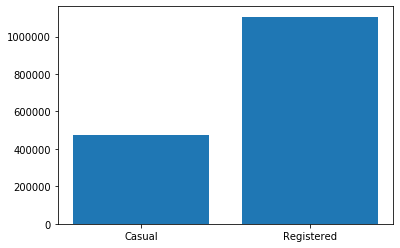

In [8]:
# create a table, a barplot, and pie chart of subscriber type: 'subsc_type'

# 2 ways to do the same thing:
subsc_counts = np.unique(hubway_data['subsc_type'], return_counts=True)
print(subsc_counts)

print(np.unique(hubway_data.subsc_type,return_counts=True))

# now for the barplot
plt.bar(subsc_counts[0],subsc_counts[1])
plt.show()

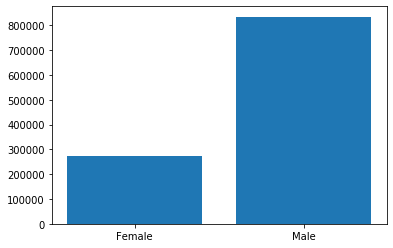

In [9]:
# Create a table of counts for each gender in the checkout data set 
# Use this table to create a bar plot of gender 
# Hint: use .dropna() on the relevant variable

################
# Your code here
################

gender_counts = np.unique(hubway_data['gender'].dropna(), return_counts=True)

plt.bar(gender_counts[0],gender_counts[1])
plt.show()



Mean Age = 35.48022780940213
Median Age = 32.0
Minimum Age = 17.0
Maximum Age = 79.0
Standard Deviation of Age = 10.988319684159583


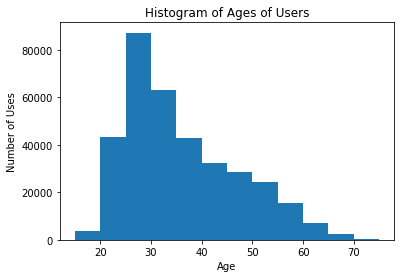

In [10]:

# create a variable 'age' outside the data frame for the ages of users (use 'checkout_year').  
# Then add the variable into the data frame  

################
# Your code here
################

age = checkout_year - hubway_data['birth_date']
hubway_data['age'] = age


# calculate mean, median, sd, min, and max of the ages of hubway users
# be careful handling nan's in np.median (.dropna() may be helpful)

################
# Your code here
################

print("Mean Age =",  np.mean(age))
print("Median Age =", np.median(age.dropna()))
print("Minimum Age =", np.min(age))
print("Maximum Age =", np.max(age))
print("Standard Deviation of Age =", np.std(age))

# Create the default histogram of age using plt.hist.  
# Then improve the histogram with bins of 15-19, 20-24, etc. and improved labels
# plt.xlabel, plt.ylabel, and plt.title will be useful

################
# Your code here
################


#plt.hist(hubway_data['age'])
plt.hist(hubway_data['age'],bins=5*np.arange(3,16))
plt.title('Histogram of Ages of Users')
plt.ylabel('Number of Uses')
plt.xlabel('Age')
plt.show()



## 3. Interpretation Questions: 

1. Use summary statistics and the histogram above to describe the distribution of user ages in the data set.

2. What is wrong with the statement "The average age of Hubway bike share users is roughly 35.5 years old"?.

3. What would be a better interpretation of the mean age of the users calcualted here?

*Your answer here*

1. This histogram is moderately to strongly right-skewed, ranging from 17 years to 79 years, with an average age of 35.5, roughly.  The bulk of the data is between about 20 and 40 years of age.

2. This is calculated based on the average age of each ride, not the average age of all users (so if younger people use the bikes more often, this will pull the value here down compared to the true average age of unique users).

3. This is the average age of uses/rides taken, not unique users.

## 4. More Visualizations

Look at creating subfigures and exploring the usage across location (distance from Boston 'center city').


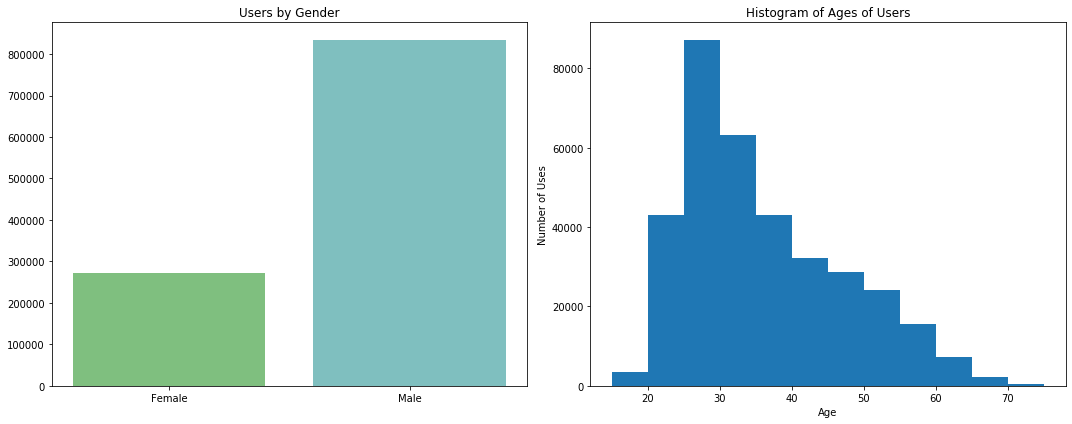

In [11]:

# subplots: put both the barplot of gender and histogram of time into the same figure

fig, ax = plt.subplots(1, 2, figsize=(15, 6))


# use ax[0].bar to put the barplot in the first subplot 


################
# Your code here
################

ax[0].bar(gender_counts[0],gender_counts[1], align='center', color=['green', 'teal'], alpha=0.5)
ax[0].set_title('Users by Gender')

# use ax[1].bar to put the histogram in the second subplot 

################
# Your code here
################

ax[1].hist(hubway_data['age'],bins=5*np.arange(3,16))
ax[1].set_title('Histogram of Ages of Users')
ax[1].set_ylabel('Number of Uses')
ax[1].set_xlabel('Age')

plt.tight_layout()
plt.show();




### Where

In [12]:
# read in the separate station data

station_data = pd.read_csv('hubway_stations.csv', low_memory=False)[['station','id', 'lat', 'lng']]
station_data.head()

,station,id,lat,lng
0,Colleges of the Fenway,3,42.340021,-71.100812
1,Tremont St. at Berkeley St.,4,42.345392,-71.069616
2,Northeastern U / North Parking Lot,5,42.341814,-71.090179
3,Cambridge St. at Joy St.,6,42.361285,-71.065140
4,Fan Pier,7,42.353412,-71.044624


In [13]:
# join the two together data

hubway_data_with_gps = hubway_data.join(station_data.set_index('id'), on='strt_statn')
hubway_data_with_gps.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,age,station,lat,lng
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,35.0,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,45.0,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,68.0,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,30.0,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,28.0,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364


![Alt](../fig/Lecture1a_g2.png)

In [14]:
# a user-defined function to calculate distances 'as the crow flies'

def haversine(pt, lat2=42.3604, lon2=-71.05868):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    Center City (of Boston) is the default comparison point
    """
    lon1 = pt[0]
    lat1 = pt[1]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3958.8 # Radius of earth in miles
    return c * r

In [15]:

# determine the number of checkouts at each station, and add 'checkouts'  to the 'station_data' data frame
# Hint: use .dropna() on the relevant array

################
# Your code here
################

station_counts = np.unique(hubway_data['strt_statn'].dropna(), return_counts=True)
counts_df = pd.DataFrame(station_counts[1],index = station_counts[0],columns=['checkouts'])
station_data['checkouts'] = station_counts[1]

station_data.head()

,station,id,lat,lng,checkouts
0,Colleges of the Fenway,3,42.340021,-71.100812,9734
1,Tremont St. at Berkeley St.,4,42.345392,-71.069616,18058
2,Northeastern U / North Parking Lot,5,42.341814,-71.090179,10630
3,Cambridge St. at Joy St.,6,42.361285,-71.065140,23322
4,Fan Pier,7,42.353412,-71.044624,9163


In [16]:
# using the hersine function to create 'dist_to_center' variable 
dist_to_center = list(map(haversine, station_data[['lng', 'lat']].values))

################
# Your code here, and add it to the 'station_data' data frame
################

station_data['dist_to_center'] = dist_to_center



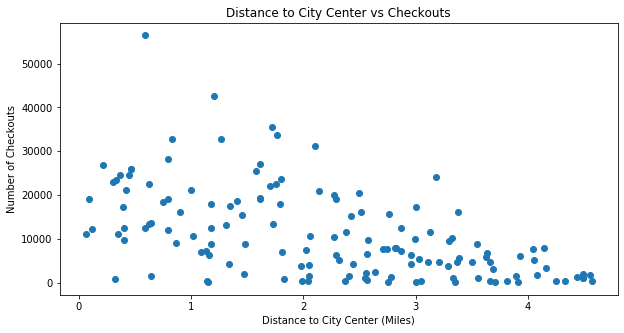

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# use ax.scatter to create a scatter plot of x = 'dist_to_center' and y = 'checkouts'

ax.scatter(station_data['dist_to_center'].values, station_data['checkouts'].values)

ax.set_xlabel('Distance to City Center (Miles)')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Distance to City Center vs Checkouts')
plt.show()



### When...this is done for you

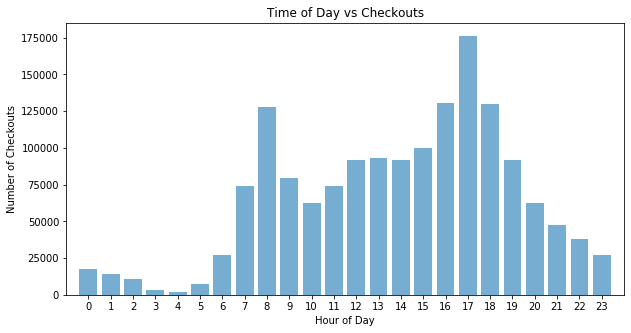

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

checkout_counts = np.unique(checkout_hour, return_counts=True)
plt.bar(checkout_counts[0], checkout_counts[1], align='center', width=0.8, alpha=0.6)
ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')

plt.show()

## 5. More Interpretations

1. What do you notice in the scatterplot of checkouts vs. distance above?  What does this say about useage of the system, in general?

2. What type of figre is the above plot titled 'Time of Day vs Checkouts'?  Describe what you notice in it.  Why does this make sense?

3. How can Hubway use this information to improve their systems?

*your answer here*

1. Stations closer to downtown are more popular.  This is not surprising as there is more density (of people and workplaces) as you get closer to downtown.

2. This is a barplot, technically (though not very different from a histogram since the categorical variable 'hour' is quantitative).  We notice that the stations are much more popular at rush hours (8am and 5pm) then any other time of day.

3. Hubway may want to increase the number of stations closer to downtown, and must consider the 1-way flow of bikes for commuters at rush hour.

## 6. Further Investigations:

Explore the data to investigate three questions:
    
1. Which station is most popular (for check-outs)?

2. How long does it take to bike from 'Harvard Square at Mass Ave/ Dunster' (closest stop to Harvard Square center) to 'South Station - 700 Atlantic Ave.' (to catch a train)?

3. What are noticeable differences between Registered and Casual users?  Consider variables we've already looked at or created.


In [19]:
# answering #1

################
# Your code here
################

id_max = station_counts[0][np.argmax(station_counts[1])]

station_data['station'][station_data['id']==id_max]

19    South Station - 700 Atlantic Ave.
Name: station, dtype: object

In [20]:
# answering #2 

harvard_id = station_data['id'][station_data['station']=='Harvard Square at Mass Ave/ Dunster']

################
# Your code here
################

south_id = station_data['id'][station_data['station']=='South Station - 700 Atlantic Ave.']
print(south_id, "\n", harvard_id)

19    22
Name: id, dtype: int64 
 70    74
Name: id, dtype: int64


In [21]:
print(np.sum(hubway_data[['end_statn']] ==  south_id.values))


end_statn    56280
dtype: int64


In [22]:
print((hubway_data[['strt_statn']] ==  harvard_id.values).values)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


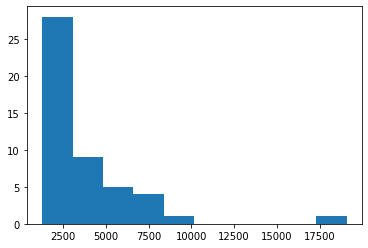

In [23]:
trips_loc = (hubway_data[['strt_statn']] ==  harvard_id.values).values & (hubway_data[['end_statn']] ==  south_id.values).values
trips_loc
trips = hubway_data[trips_loc]
trips.shape

np.median(trips['duration'])

plt.hist(trips['duration'])
plt.show()

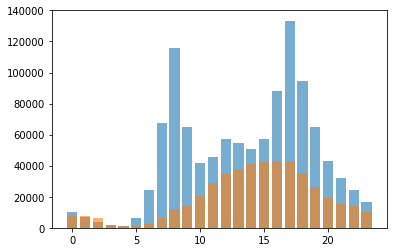

In [24]:
# answering #3

################
# Your code here
################


check_out_counts_reg = np.unique(checkout_hour[hubway_data['subsc_type']=='Registered'], return_counts=True)
check_out_counts_cas = np.unique(checkout_hour[hubway_data['subsc_type']=='Casual'], return_counts=True)

plt.bar(check_out_counts_reg[0],check_out_counts_reg[1], alpha=0.6)
plt.bar(check_out_counts_cas[0],check_out_counts_cas[1], alpha=0.6)

plt.show()

*your answer here*

While the registered users show peaks of usage at rush hours (8am and 5pm (hours=17)), casual users tend to use hubway in the 'middle of the day'.  This is likely due to the fact that registered users are more likely to use hubway for commuting while casual users are more likely to use it for late morning or afternoon excursions or weekend trips.